# Solution Planning

## Business Problem

**Qual é o problema de negócios?**
1. Selecionar os clientes mais valiosos para integrar o programa de fidelidade "Loyals".

2. Responder a questões de negócio ao time de marketing.

### Output

**O que vou entregar? / Onde o time de negócio quer ver?**

* 1) Lista em xls / enviar por email. Deve conter clientes que irão aderir ao Loyals (programa de fidelidade). 
   - Formato:
   
| client_id | is_loyal |
|-----------|----------|
|1          |yes       |
|2          |no        |

* 2) Relatório em pdf respondendo as questões de negócio / enviar por email e apresentar ao time de marketing:
    - Quem são as pessoas elegíveis para participar do programa Loyals?
    - Quantos clientes farão parte do grupo?
    - Quais são as principais características desses clientes?
    - Qual a porcentagem de contribuição de faturamento, vinda do Loyals?
    - Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Quais as condições para uma pessoa ser elegível ao Loyals? 
    - Quais as condições para uma pessoa ser removida do Loyals?
    - Qual a garantia que o programa Loyals é melhor que o restante da base?
    - Quais ações do time de marketing pode realizar para aumentar o faturamento?

### Input

**Fontes de dados:**
    Dataset "Ecommerce.csv", contendo as vendas de e-commerce do período de um ano.

**Ferramentas:**
    Python 3.8.12, Jupyter Notebook, Git, Github.

### Process

**Tipo de problema:**
Separação de clientes por grupos.
    
**Principais métodos:**
    Clusterização.

**Perguntas de negócio:**
* 1) Quem são as pessoas elegíveis para participar do programa Loyals?
    - O que é ser elegível? / O que são clientes de maior "valor"? (de acordo com área de negócio) 
        - Faturamento:
             - Alto ticket médio
             - Alto LTV (soma da receita do cliente conosco)
             - Baixa recência (tempo desde a última compra)
             - Alto basket size (qtd produtos comprados por compra)
             - Baixa probabilidade de churn (usaria a saída de um modelo)
             - Alta Previsão LTV (usaria saída de um modelo)
             - Alta propensão de compra (usaria a saída de um modelo)
        - Custo:
             - Baixa taxa de devolução
        - Experiência de compra:
             - Média alta das avaliações

 PS: as features acima serão criadas no feature engeneering. 
 
 
* 2) Quantos clientes farão parte do grupo?
    - Número de clientes
    - % em relação ao total de clients
    
    
* 3) Quais são as principais características desses clientes?
    - Escrever caracterísiticas do cliente:
        - Idade
        - País
        - Salário
        - Localização
     - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Vide features da clusterização (questão 1)
         
 Para look alike: prospectar clientes parecidos na internet


* 4) Qual a porcentagem de contribuição de faturamento, vinda do Loyals?
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Loyals.   
   
   
* 5) Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Cálculo do LTV do Loyals (com média móvel, time series, arima..)
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    - Análise de Cohort (com tempo, localização, produto..)       

 Deve haver meta de faturamento, consultar negócio.
    
    
* 6) Quais as condições para uma pessoa ser elegível ao Loyals?
    - Definir o período de avaliação (a cada 1 mês, 3 meses..)
    - O "desempenho" do cliente deve estar próximo da média do cluster Loyals.
    
    
* 7) Quais as condições para uma pessoa ser removida do Loyals?
    - O "desempenho" do cliente não está mais próximo da média do cluster Loyals. 
   
   
* 8) Qual a garantia que o programa Loyals é melhor que o restante da base?
    - Teste A/B
    - Teste de hipótese


* 9) Quais ações do time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferência de compra
    - Frete mais barato
    - Visita a empresa
    - Oferecer personal stylist
    - Recomendar cross sell 
    - Oferecer conteúdo expclusivo

## Solution Benchmarking

### Desk Research

Leitura de artigos sobre customer segmentation na internet, para compreender o que o mercado está fazendo.

Identificar a partir das soluções do mercado, com o time de negócio, o que podemos fazer como MVP.

1. Modelo RFM de segmentação.

# Environment Preparation

## Imports

In [34]:
import pandas            as pd
import seaborn           as sns
import datetime          as dt
from matplotlib               import pyplot as plt
from tabulate                 import tabulate
from IPython.core.display     import HTML
from sklearn                  import cluster as c
from sklearn                  import metrics as m
from yellowbrick.cluster      import KElbowVisualizer
from plotly                   import express as px
#from IPython.display         import Image

## Helper Functions

In [3]:
def jupyter_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)
    sns.set()
jupyter_settings()

# Data Collection

In [54]:
%ls -l ../data/raw/

total 83400
-rw-rw-r--@ 1 home  staff  42697197 Apr 29  2021 Ecommerce.csv


In [55]:
#read data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='unicode_escape')

In [56]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [61]:
df_raw = df_raw.drop('Unnamed: 8', axis=1).copy()
df_raw.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
510894,579470,22998,TRAVEL CARD WALLET KEEP CALM,3,27-Nov-17,0.42,16549.0,United Kingdom
208159,555096,23174,REGENCY SUGAR BOWL GREEN,4,29-May-17,4.15,12682.0,France
403837,571654,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,1,16-Oct-17,0.79,18118.0,United Kingdom


# Data Description

In [62]:
df1 = df_raw.copy()

## Rename Columns

In [63]:
df1.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
459556,575875,23084,RABBIT NIGHT LIGHT,22,9-Nov-17,4.13,NaN,United Kingdom
218217,556023,22672,FRENCH BATHROOM SIGN BLUE METAL,4,6-Jun-17,1.65,14527.0,United Kingdom
278951,561220,22431,WATERING CAN BLUE ELEPHANT,6,24-Jul-17,1.95,17734.0,United Kingdom


In [64]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [65]:
df1.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

## Feature Description 

In [66]:
# Explain feature meanings
tab_meanings = [['Columns', 'Meaning'],
        ['invoice_no', 'unique identifier of each transaction'],
        ['stock_code', 'item code'],
        ['description', 'item name'],
        ['quantity', 'quantity of each item purchased per transaction'],
        ['invoice_date', 'the day the transaction took place'],
        ['unit_price', 'product price per unit'],
        ['customer_id', 'unique customer identifier'],
        ['country', 'customer\'s country of residence']
      ]
print(tabulate(tab_meanings, headers='firstrow', stralign='left', tablefmt='simple'))

Columns       Meaning
------------  -----------------------------------------------
invoice_no    unique identifier of each transaction
stock_code    item code
description   item name
quantity      quantity of each item purchased per transaction
invoice_date  the day the transaction took place
unit_price    product price per unit
customer_id   unique customer identifier
country       customer's country of residence


In [67]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
248234,558808,84987,SET OF 36 TEATIME PAPER DOILIES,1,2-Jul-17,3.75,NaN,United Kingdom
306558,563771,23232,WRAP VINTAGE LEAF DESIGN,25,17-Aug-17,0.42,17841.0,United Kingdom
248214,558778,23209,LUNCH BAG DOILEY PATTERN,10,2-Jul-17,1.65,17160.0,United Kingdom


## Data Dimensions

In [68]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Check NA

In [70]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [71]:
#remove rows with NA
df1 = df1.dropna( subset=['description','customer_id'] )

In [72]:
print (f'Removed data: { 1-(df1.shape[0] / df_raw.shape[0]):.2f}%')

Removed data: 0.25%


In [78]:
df1.tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France


In [79]:
#reset index
df1 = df1.reset_index(drop=True)

In [80]:
#new num of rows
df1.shape

(406829, 8)

In [81]:
#check
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change Types

In [ ]:
#correct data types ensure correct calculations using the columns on next sessions

In [82]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [83]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
255523,567484,23395,BELLE JARDINIERE CUSHION COVER,4,18-Sep-17,3.75,17340.0,United Kingdom
172410,558044,23206,LUNCH BAG APPLE DESIGN,10,22-Jun-17,1.65,13870.0,United Kingdom
112857,550483,22993,SET OF 4 PANTRY JELLY MOULDS,2,16-Apr-17,1.25,16033.0,United Kingdom


In [84]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

In [85]:
#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [86]:
# invoice_no
#df1['invoice_no'] = df1['invoice_no'].astype(int)
#there are letters on invoice, so let it like object(string). Ex: 'C536379', 'C554197'

In [87]:
# stock_code
#df1['stock_code'] = df1['stock_code'].astype(int)
#there are letters on stock_code, so let it like object(string). Ex: '85123A', '84406B'

In [88]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
388470,579741,22402,MAGNETS PACK OF 4 VINTAGE COLLAGE,1,2017-11-28,0.39,16910,United Kingdom
231638,564958,23292,SPACEBOY CHILDRENS CUP,16,2017-08-29,1.25,13089,United Kingdom
12964,537871,22703,PINK CAT BOWL,1,2016-12-06,2.10,12748,United Kingdom


In [89]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## Descriptive Statistics

In [90]:
#pass on first cycle
pass

# Feature Engeneering

## Feature Creation

In [91]:
ls ../data

external/  interim/   processed/ raw/


In [92]:
#save dataset
df1.to_csv("../data/interim/df1_data_description_done.csv")

In [84]:
df2 = pd.read_csv("../data/interim/df1_data_description_done.csv", index_col=0, parse_dates=['invoice_date'])
df2.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
285033,570192,22737,RIBBON REEL CHRISTMAS PRESENT,10,2017-10-05,1.65,17509,United Kingdom
96005,548409,21843,RED RETROSPOT CAKE STAND,6,2017-03-29,10.95,12731,France
42116,541919,22457,NATURAL SLATE HEART CHALKBOARD,6,2017-01-22,2.95,14334,United Kingdom


In [85]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [86]:
# our current granularity is: stock_code + invoice_date
# we need to have customer as granularity, to have is's features on a new table.
# let's start adjusting the dataset to build an RFM Segmentation Model (Recency, Frequency, Monetary Value)

In [88]:
#get first customer as sample
df2.loc[ df2['invoice_no'] == '536365']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2016-11-29,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2016-11-29,4.25,17850,United Kingdom


In [90]:
#create the referente table with uniques customer_id (and reset index)
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True).copy()

In [91]:
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [92]:
#let's now create the 3 variables needed to use the RFM Segmentation Model 

### gross_revenue

In [93]:
# Gross Revenue: (quantity * price of each purchase)
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']
df2.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,gross_revenue
311372,572562,22816,CARD MOTORBIKE SANTA,12,2017-10-23,0.42,13481,United Kingdom,5.04
216103,563205,23301,GARDENERS KNEELING PAD KEEP CALM,4,2017-08-12,1.65,14040,United Kingdom,6.60
37061,541266,21754,HOME BUILDING BLOCK WORD,1,2017-01-14,5.95,15673,United Kingdom,5.95


In [94]:
# df_monetary = gorss_revenue by customer
df_monetary = df2[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_monetary

,customer_id,gross_revenue
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2094.88


In [95]:
#merge df_ref + df_monetary
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

In [96]:
#check possible join problems
df_ref.isna().sum()

customer_id      0
gross_revenue    0
dtype: int64

In [97]:
#reference table of customer_id with first var
df_ref.head()

,customer_id,gross_revenue
0,17850,5288.63
1,13047,3079.10
2,12583,7187.34
3,13748,948.25
4,15100,635.10


### recency

In [98]:
# Recency: number of days since last purchase

In [99]:
# get each customer's last day of purchase 
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency.head()

,customer_id,invoice_date
0,12346,2017-01-16
1,12347,2017-12-05
2,12348,2017-09-23
3,12349,2017-11-19
4,12350,2017-01-31


In [100]:
#'2017-12-07' is the last day with purchases on this dataset. 
# Let's assume '2017-12-07' is today, avoiding big distortions. Using updated dataset, last purchase would be recent (dataset is 4y/o +).
# In real cases, this variable would be dt.date.today(), and could be updated daily.
today = df2['invoice_date'].max()
today

Timestamp('2017-12-07 00:00:00')

In [101]:
#Calculate number of days since last purchase
#"today" (being '2017-12-07') - invoice_date (last day of purchase of each customer)
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency

,customer_id,invoice_date,recency_days
0,12346,2017-01-16,325
1,12347,2017-12-05,2
2,12348,2017-09-23,75
3,12349,2017-11-19,18
4,12350,2017-01-31,310
...,...,...,...
4367,18280,2017-03-05,277
4368,18281,2017-06-10,180
4369,18282,2017-11-30,7
4370,18283,2017-12-04,3


In [102]:
#check recency days (2017-12-07 -> 2017-01-16) = 325 days
df2['invoice_date'].max()

Timestamp('2017-12-07 00:00:00')

In [103]:
df_recency

,customer_id,invoice_date,recency_days
0,12346,2017-01-16,325
1,12347,2017-12-05,2
2,12348,2017-09-23,75
3,12349,2017-11-19,18
4,12350,2017-01-31,310
...,...,...,...
4367,18280,2017-03-05,277
4368,18281,2017-06-10,180
4369,18282,2017-11-30,7
4370,18283,2017-12-04,3


In [104]:
#drop invoice_date (max purchase date) from df_recency
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_recency

,customer_id,recency_days
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


In [105]:
# merge df_recency w/ df_ref
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref

,customer_id,gross_revenue,recency_days
0,17850,5288.63,302
1,13047,3079.10,31
2,12583,7187.34,2
3,13748,948.25,95
4,15100,635.10,330
...,...,...,...
4367,13436,196.89,1
4368,15520,343.50,1
4369,13298,360.00,1
4370,14569,227.39,1


In [106]:
#check NA
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
dtype: int64

### frequency

In [107]:
# Frequency (number of purchases)

In [108]:
#check customer_id and invoice_no
#there are many duplicated invoices per customer
df2[['customer_id','invoice_no']].head(10)

,customer_id,invoice_no
0,17850,536365
1,17850,536365
2,17850,536365
3,17850,536365
4,17850,536365
5,17850,536365
6,17850,536365
7,17850,536366
8,17850,536366
9,13047,536367


In [109]:
#create new dataset with customer_id and invoice_no
#drop duplicates() to get count just one duplicate per customer
df_freq = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq.head()

,customer_id,invoice_no
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [110]:
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


In [111]:
#check NAs
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
dtype: int64

# Variable Filtering

In [112]:
df2.to_csv("../data/interim/df2_feature_engineering_done.csv")
df_ref.to_csv("../data/interim/df_ref_done.csv")

In [118]:
#df3 = df_ref
df3 = pd.read_csv("../data/interim/df_ref_done.csv", index_col=0)
df3.dtypes

customer_id        int64
gross_revenue    float64
recency_days       int64
invoice_no         int64
dtype: object

In [119]:
#three needed vars created, no filtering needed
pass

# EDA

In [120]:
#pass by now
df4 = df3.copy()

# Data Preparation

In [121]:
#pass by now
df5 = df4.copy()

# Feature Selection

In [122]:
#pass by now
df6 = df5.copy()

# Hyperparameter Fine-Tuning

In [123]:
#drop customer_id
X = df6.drop('customer_id', axis=1).copy()
X.head()

,gross_revenue,recency_days,invoice_no
0,5288.63,302,35
1,3079.10,31,18
2,7187.34,2,18
3,948.25,95,5
4,635.10,330,6


For a good clustering, we need clusters to have two properties:

- Compactness: smallest possible distance between the points of the same cluster.
- Separation: greatest possible distance between the points of different clusters.

Let's use k-means with 2 metrics: 

1 - Within-Cluster Sum of Square (WSS) - calculates Compactness 

2 - Silhouette Score (SS) - calculates Compactness and Separation

 


## Within-Cluster Sum of Square (WSS)

In [124]:
#define from 2 to 6 possible clusters
clusters = [2, 3, 4, 5, 6]

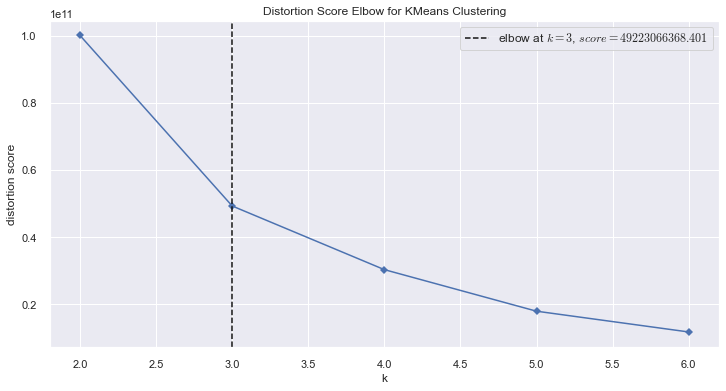

In [125]:
#let's use yellowbrick library, that inherits some functions from sklearn, and makes it easier to use performance metrics like WSS and SS
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False )
kmeans.fit(X)
kmeans.show();
#it will sugest the number of clusters (dotted lines)

In [126]:
#The smaller the WSS, the smaller the sum of the distances within the clusters, which means that the points are closer to their centroid, so the cluster is more compact!

#even though with more cluster (4, 5 ou 6), we would have (a bit) more condensed clusters, the optimized number of clusters according to WSS is 3.

## Silhouette Score

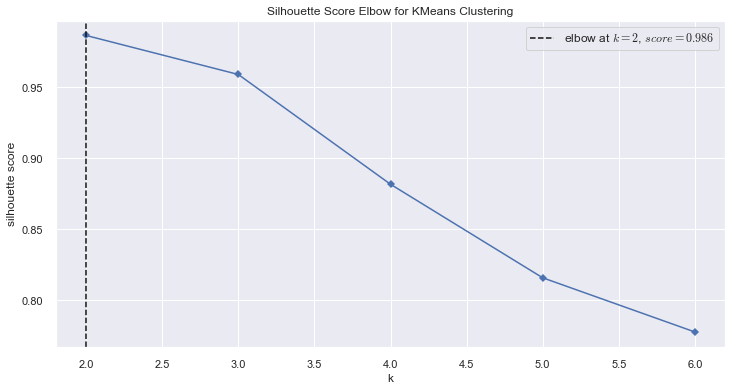

In [127]:
#calculate silhouette score also with yellowbrick library
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit(X)
kmeans.show();

In [128]:
#being SS=1 the best clustering result:
    # with 2 clusters, the result is 0.99 (awesome)
    # with 3 clusters, it is 0,96 (awesome)
    # with 4, or 5, we still have SS > 0.8, it's still very good!

#according to SS, the ideal cluster number is 2, but fur business porposes, it's interesting to have at least 3 groups of customers, to be able to put actions on each of them. 

# Model Training

## K-Means

In [132]:
# Let's then continue with the projectand train the k-means model with 3 clusters.

#model definition
k = 3
kmeans = c.KMeans( init='random', #init centroids ramdomly
                  n_clusters=k, #3
                  n_init=10, #Num of times k-means will be run with different centroid seeds.
                  max_iter=300, #up to 300 times
                 random_state=42) #seed, to generate the same random init
#model training
kmeans.fit(X)

#clustering
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

## Cluster Validation

In [133]:
#Metric: WSS (Within-cluster sum of square)

#this method of k-means (sklearn) returns the WSS
print(f'WSS Value: {kmeans.inertia_}')

WSS Value: 52830442008.006966


In [134]:
#Metric: SS (Silhouette Score)

#this method of k-means (sklearn) returns the SS
print(f'SS Value: {m.silhouette_score(X, labels, metric="euclidean")}')

SS Value: 0.9494677566681542


# Cluster Analysis

In [135]:
df9 = df6.copy()
#create a cluster column with labels of it's cluster from k-means, to be able to plot colored clusters
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


## Visualization Inspection

In [137]:
#consists on plotting the cluster
fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
fig.show()

In [138]:
#the "best" customers according to our 3 metrics are pink ones, but we got just 6 of them on a cluster!

## Cluster Profile

In [139]:
#using 4 metrics, with average to represent the centroid of the group (mean), let's understand who are the people inside each cluster

In [140]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


In [141]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = df_cluster['customer_id'] / df_cluster['customer_id'].sum()*100
df_cluster
#there is more than 99% of my customers in one cluster (0), so we need to work on features to improve this#

,cluster,customer_id,perc_customer
0,0,4335,99.153705
1,1,6,0.137237
2,2,31,0.709058


In [142]:
# Agg gross revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')
df_cluster

,cluster,customer_id,perc_customer,gross_revenue
0,0,4335,99.153705,1372.577826
1,1,6,0.137237,182181.981667
2,2,31,0.709058,40543.517742


In [143]:
# Avg recency days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days
0,0,4335,99.153705,1372.577826,92.257901
1,1,6,0.137237,182181.981667,7.166667
2,2,31,0.709058,40543.517742,13.290323


In [144]:
# Avg invoice number
df_avg_invoice_no = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no
0,0,4335,99.153705,1372.577826,92.257901,4.614533
1,1,6,0.137237,182181.981667,7.166667,89.000000
2,2,31,0.709058,40543.517742,13.290323,53.290323



**Cluster 1 (Loyal candidates)**
- Number of customers: 6 (0.1% of customers)
- Average revenue: $ 182,182.00
- Average recency: by each 7 days (1 weeks)
- Average purchases: 89 purchases

**Cluster 2**
- Number of customers: 31 (0.7% of customers)
- Average revenue: $ 40,543.00
- Average recency: by each 13 days (2 weeks)
- Average purchases: 52 purchases


**Cluster 3**
- Number of customers: 4335 (99% of customers)
- Average revenue: $ 1,372.00
- Average recency: by each 92 days (3 months)
- Average purchases: 5 purchases

# Deploy